# California Housing Prices
****

Context

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

# Importing the libraries
****

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#%matplotlib inline #Jupyter's own backend
import os
import seaborn as sns
import pickle
import joblib

# About the dataset

"About the dataset" section is used for getting the insights about the housing dataset and patterns in data.
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

# Importing the data
****
Each row represents one district.

In [2]:
housing = pd.read_csv('California_housing_price_data.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 206440 entries, ocean_proximity is object data type (it can hold any value)

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


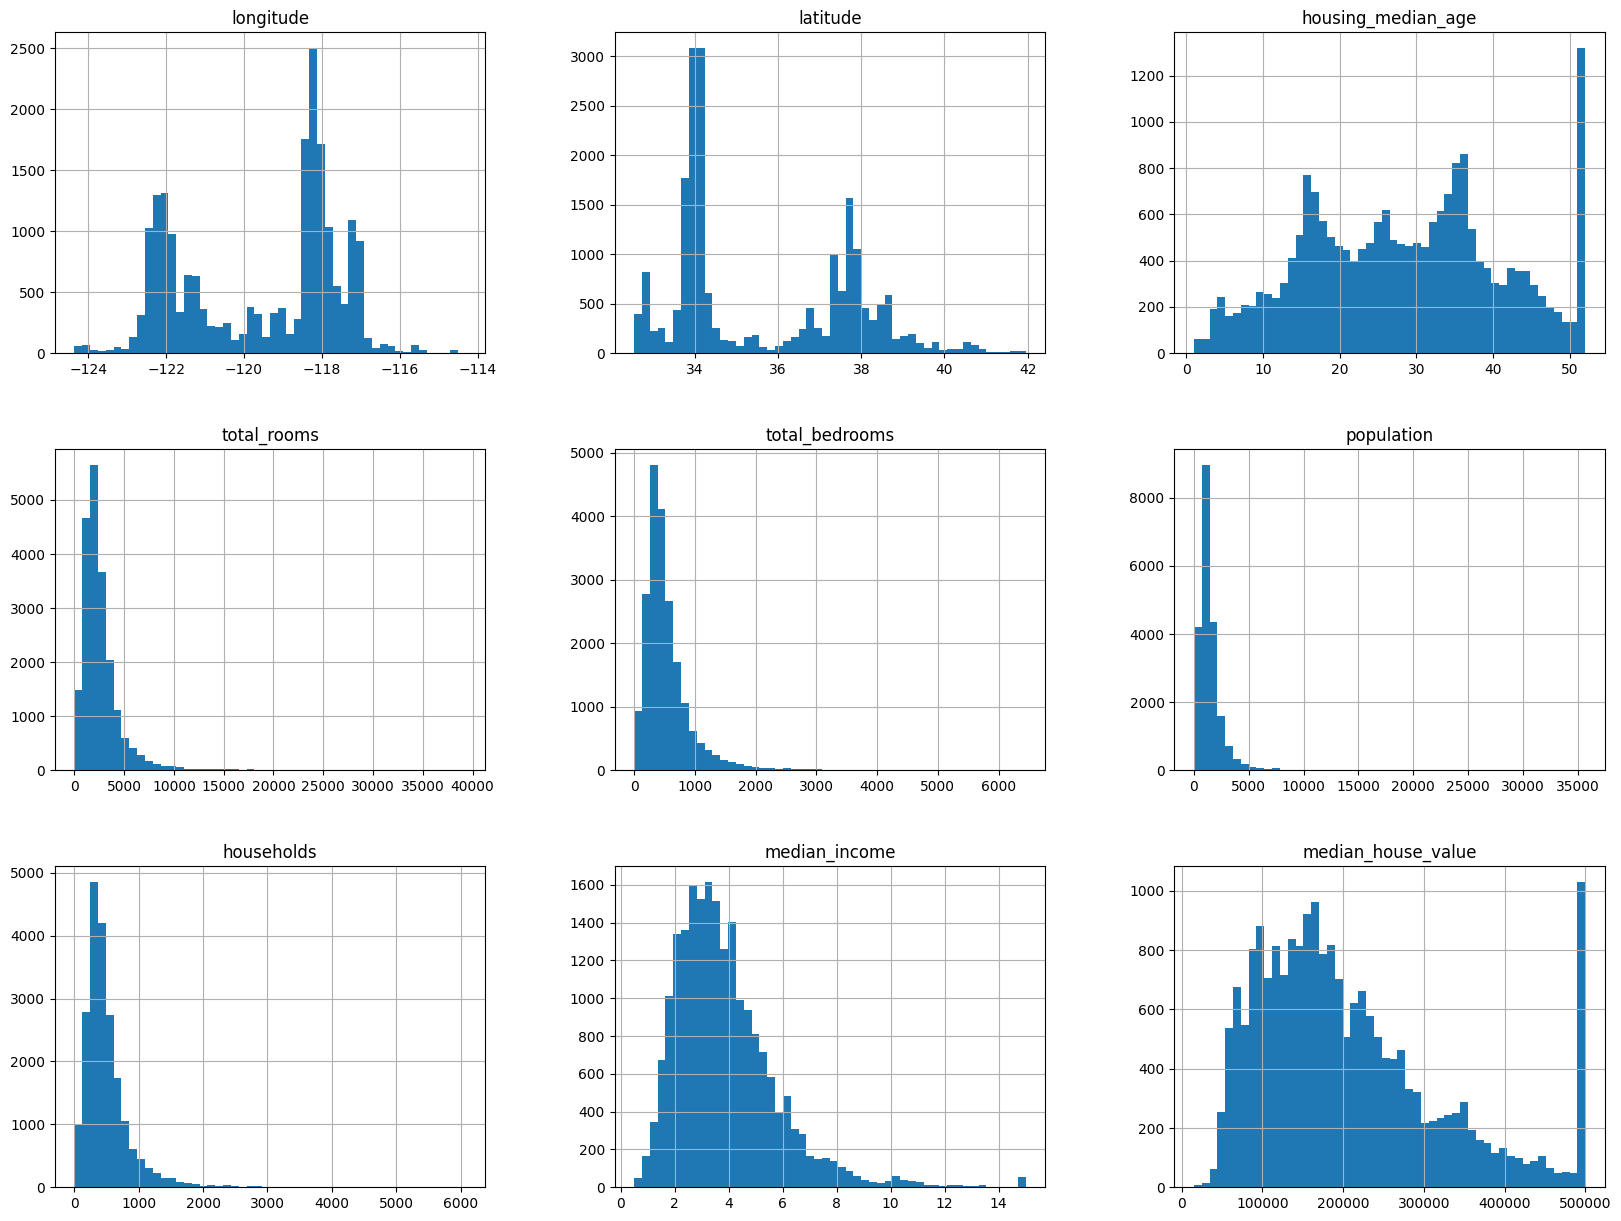

In [5]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

Let's take a look into the only non-numerical (ocean_proximity) attribute:

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Creating a test set

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 0)

Test set should be representative of overall population.
Since median_income attribute is important predictor of median prices, we will see if this part of the test set is representative of overall population.
So we will create new income category attribute (income_cat) that will hold median income categories:

<AxesSubplot:>

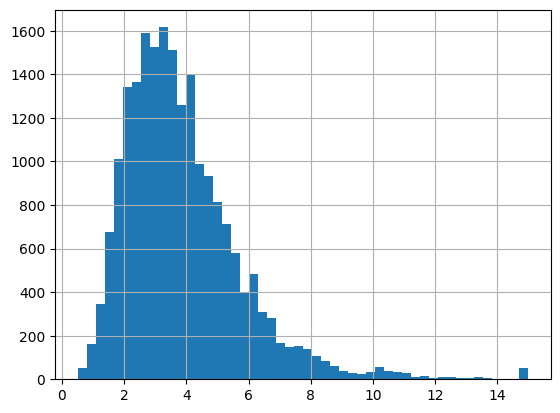

In [10]:
housing["median_income"].hist(bins = 50)

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
      bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
      labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

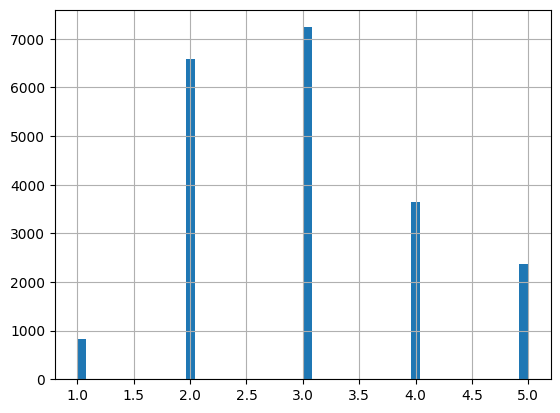

In [12]:
housing["income_cat"].hist(bins = 50)

**Stratified sampling based on the income category**
****

Creating the classes

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**Income category proportions in the overall dataset vs test set**
****

Income category proportions in the overall dataset:

In [14]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Income category proportions in the test set:

In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

This way we see that the proportions in the test set generated using stratified sampling and the overall dataset are almost identical.
Now we can remove the income_cat attribute:

In [16]:
for dataset in (strat_train_set, strat_test_set, housing):
    dataset.drop("income_cat", axis = 1, inplace = True)

# Data discovery and visualization
****

In [17]:
housing = strat_train_set.copy()

**Visualize the geographical data**
****

s - the **radius** of circles represents the population size

c - the **color** of the circles represents the price

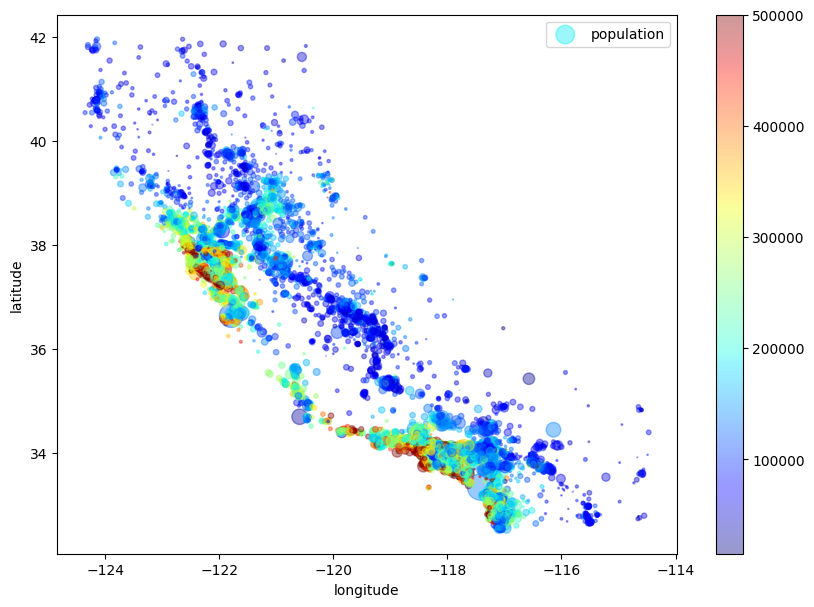

In [18]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population",
            c = housing["median_house_value"], cmap = "jet", colorbar = True, figsize = (10,7))
plt.legend()

From this image, we can see that housing prices are related to the location and the population density. However, this isn't the rule always, as there is housing in the north close to the ocean but with lower price.

**Looking for correlations**
****

The dataset isn't too large -> we can compute standard correlation coefficient (Pearson's) between every pair of attributes:

<AxesSubplot:>

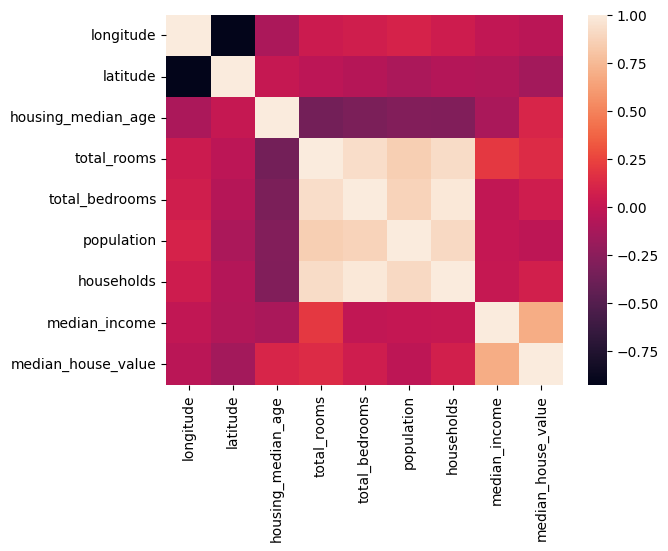

In [19]:
sns.heatmap(housing.corr())

It is visible from the correlation matrix that the median house value (target variable) is negatively correlated to latitude and population: the norther the house, the smaller the value. Also, median house value is positively correlated to median income, meaning the higher the median income in the district, the higher the median house value.

Next, scatter plots of the few attributes most correlated to the median house value will be created (pandas' scatter_matrix).

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='l

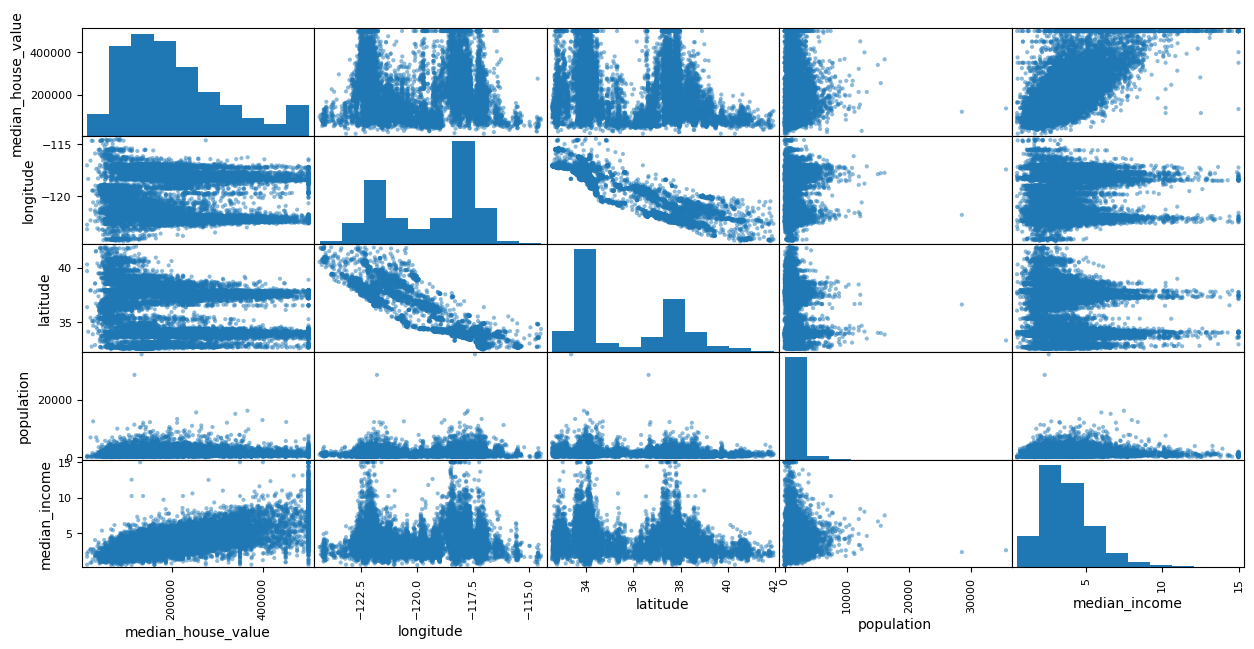

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "longitude", "latitude", "population", "median_income"]

scatter_matrix(housing[attributes], figsize = (15,7))

**Median house value and median income**
****

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

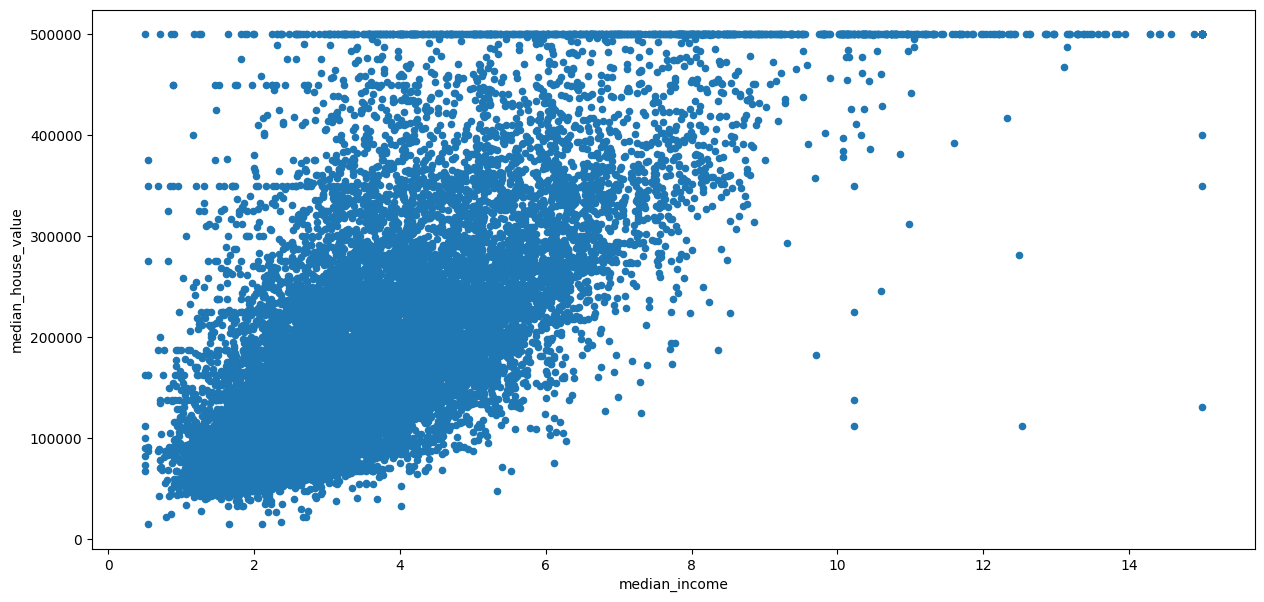

In [21]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", figsize = (15,7))

The horizontal lines are result of data capping and they will be removed so that the algorithm doesn't reproduce these data quirks.

In [22]:
housing["median_house_value"].value_counts(sort = "desc")

500001.0    769
162500.0     94
137500.0     93
112500.0     83
225000.0     77
           ... 
499100.0      1
456200.0      1
398500.0      1
351800.0      1
371300.0      1
Name: median_house_value, Length: 3666, dtype: int64

In [23]:
capped_val_remove = [500001.0, 137500.0, 162500.0, 112500.0, 225000.0, 187500.0, 350000.0, 87500.0, 100000.0, 275000.0,
                    150000.0, 175000.0]

for value in capped_val_remove:
    housing = housing[housing.median_house_value != value]

The scatterplot after removing the capped values:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

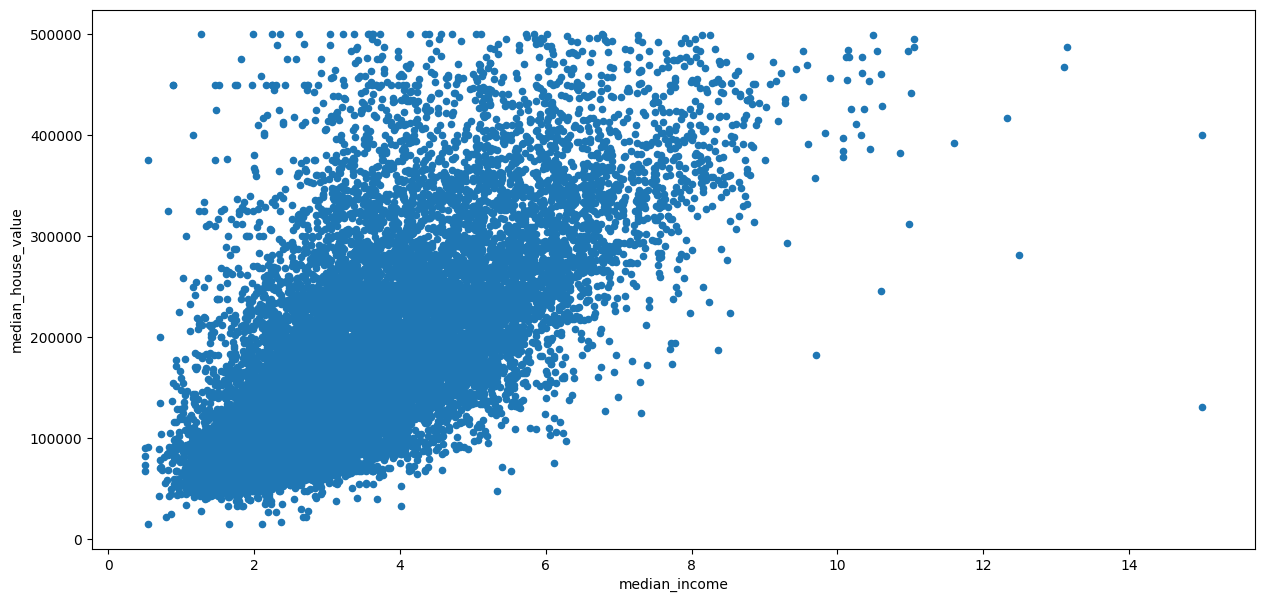

In [24]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", figsize = (15,7))

**Creating new variables - attvalues combinations**
****

There are a couple of new attributes we can create from existing ones **for every district**:
* Number of bedrooms per household
* Number of rooms per household
* Number of bedrooms per room
* Number of people (population) per household

In [25]:
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

Now let's see the correlation matrix and if there are any bigger correlation factors:

<AxesSubplot:>

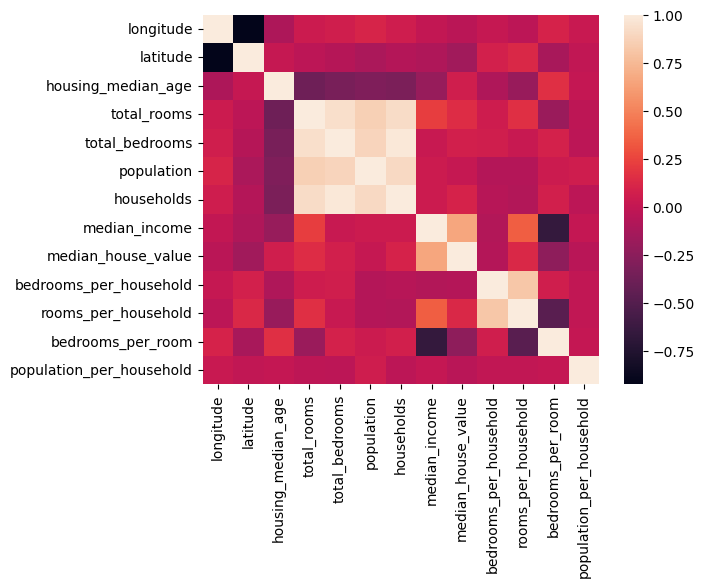

In [26]:
sns.heatmap(housing.corr())

From the heatmap of a correlation matrix, it is visible that median_house_value:
* has higher **negative** correlation to bedrooms_per_household than with total_bedrooms in a district. We can say that the houses with more bedrooms cost less

* has high **negative** correlation to bedrooms_per_room, so the houses with higher bedrooms/room ratio are cheaper

* has higher **positive** correlation to rooms_per_household than to total_rooms in a district. Houses with more rooms (bigger houses) cost more.

# Preparing the data for Machine Learning algorithms
****

Creating the clean training_set and separating the predictors and labels:

In [27]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"]

**Data cleaning - missing values**
****

In [28]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [29]:
housing[housing.isna().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,INLAND
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND
7330,-118.17,33.98,41.0,756.0,NaN,873.0,212.0,2.7321,<1H OCEAN
8383,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
11441,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679,<1H OCEAN
13597,-117.28,34.09,44.0,376.0,NaN,273.0,107.0,2.2917,INLAND
14641,-117.20,32.79,29.0,1213.0,NaN,654.0,246.0,4.5987,NEAR OCEAN


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

housing_numerical_attributes = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)

SimpleImputer(strategy='median')

The imputer stored median values of every attribute in statistics_ instance variable

In [31]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [32]:
X = imputer.transform(housing_numerical_attributes)
X

array([[-1.2287e+02,  3.8480e+01,  2.7000e+01, ...,  1.8320e+03,
         7.1500e+02,  3.5085e+00],
       [-1.1834e+02,  3.4020e+01,  4.9000e+01, ...,  8.9600e+02,
         3.8900e+02,  2.5156e+00],
       [-1.2242e+02,  3.7790e+01,  5.2000e+01, ...,  2.1120e+03,
         1.0450e+03,  2.1343e+00],
       ...,
       [-1.2198e+02,  3.7220e+01,  4.6000e+01, ...,  3.7280e+03,
         1.7810e+03,  5.2321e+00],
       [-1.1808e+02,  3.3880e+01,  2.6000e+01, ...,  9.3100e+02,
         2.7500e+02,  5.1645e+00],
       [-1.1818e+02,  3.3800e+01,  3.0000e+01, ...,  2.9510e+03,
         6.9100e+02,  1.7689e+00]])

In [33]:
housing_tr = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

New data frame with replaced Na values:

In [34]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885
...,...,...,...,...,...,...,...,...
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878
18041,-121.98,37.22,46.0,10088.0,1910.0,3728.0,1781.0,5.2321
7915,-118.08,33.88,26.0,1507.0,270.0,931.0,275.0,5.1645


**Handling text and categorical variables**
****

In [35]:
housing_categorical = housing[["ocean_proximity"]]

In [36]:
housing_categorical.value_counts()

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)
housing_categorical_encoded

array([[0.],
       [0.],
       [3.],
       ...,
       [0.],
       [0.],
       [4.]])

In [37]:
housing_categorical_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.],
       [4.],
       [3.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

housing_categorical_encoded variable has encoded categories of ocean_proximity, however, those categories aren't more similar if closer to one another, so one-hot encoding will be used **instead** of ordinal encoding:

In [39]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_categorical_1hot =  one_hot_encoder.fit_transform(housing_categorical)
housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Custom transformer** that adds the combined attributes (rooms_per_household, bedrooms_per_room, population_per_household)
* BaseEstimator - base class
* Transformermixin - base class
* CombinedAttributesAdder - custom transformer with add_bedrooms_per_room hyperparameter used to see if the algorithm works better with or without it

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms, bedrooms, population, households = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms] / X[:, households]
        population_per_household = X[:, population] / X[:, households]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [41]:
attribute_add = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_added_attributes = attribute_add.transform(housing.values)

**Transformation pipeline**
****

Transformation pipeline is used to get all the sequences of transformations on columns. This way, we will replace steps such as imputing the Na values, combining attributes and scaling into one pipeline.

Transformation pipeline for numerical attributes:
****

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_att_pipeline = Pipeline(
[
    ('imputer', SimpleImputer(strategy = "median")),
    ('attributes_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
]
)

In [43]:
housing_numerical_transformator = num_att_pipeline.fit_transform(housing_numerical_attributes)

One transformer for all the columns would be even more useful (transformations pipeline with multiple transformations used on numerical attributes and OneHotEncoder used on categorical attributes), so here ColumnTransformer comes into play:

In [44]:
from sklearn.compose import ColumnTransformer

numerical_attributes = list(housing_numerical_attributes)
categorical_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer(
[
    ("numerical", num_att_pipeline, numerical_attributes),
    ("categorical", OneHotEncoder(), categorical_attributes)
]
)

housing_data_prepared = full_pipeline.fit_transform(housing)

# Select and train a model
****

**Linear Regression**
****

housing_labels - Linear Regression parameter of target attribute median_house_value

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_data_prepared, housing_labels)

LinearRegression()

Predicting the test set labels:

In [46]:
housing_predictions_lr = lin_reg.predict(housing_data_prepared)

Housing prediction (also marked as y_pred in other notebooks) is a predictions vector:

In [47]:
housing_predictions_lr

array([227885.17864683, 199641.86684096, 250266.3411042 , ...,
       390470.03651553, 255128.59200036, 121600.21548033])

**Model evaluation**
****

Since the data doesn't have many outliers and the task is regression task, we will use RMSE (Root Mean Squared Error):

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(housing_labels, housing_predictions_lr)
rmse = np.sqrt(mse)

In [49]:
rmse

68286.41923036716

**Decision Tree**
****

Typical prediction error of $68,284 is not very satisfying - model is underfitting the training data.
Let's try with a more complex machine learning model - Decision Tree:

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_data_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions_tree = tree_reg.predict(housing_data_prepared)

In [52]:
mse_tree = mean_squared_error(housing_labels, housing_predictions_tree)
rmse_tree = np.sqrt(mse_tree)

In [53]:
rmse_tree

0.0

**K-Fold cross validation**
****

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [55]:
tree_rmse_scores = np.sqrt(-scores)

Scores of cross validation mean and std (standard deviation shows how precise the estimate of the performance of the model is):

In [56]:
def display_scores(scores):
    print("Score: ", scores)
    print("Score Mean: ", scores.mean())
    print("Score Standard Deviation: ", scores.std())

In [57]:
display_scores(tree_rmse_scores)

Score:  [70867.13593652 72892.37301742 73472.35122712 68475.60192442
 69586.80513039 73988.86415414 70131.22658458 69278.12713091
 73024.77682906 69368.5830703 ]
Score Mean:  71108.58450048491
Score Standard Deviation:  1933.3187345919616


Decision Tree RMSE Mean is higher than Linear Regression RMSE Mean, which shows the Decision Tree model performs worse than Linear Regression model.

In comparison, k-fold cross validation for linear regression model:

In [58]:
scores_lr = cross_val_score(lin_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [59]:
lr_rmse_scores = np.sqrt(-scores_lr)

In [60]:
display_scores(lr_rmse_scores)

Score:  [65993.97246676 69010.24806374 71413.83112493 68742.95840851
 68937.97597951 66882.38169636 68302.97258028 66747.85112588
 69786.49966527 69063.19231501]
Score Mean:  68488.18834262603
Score Standard Deviation:  1515.8560925367442


**Random Forest**
****

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

rf_reg.fit(housing_data_prepared, housing_labels)

RandomForestRegressor()

In [62]:
rf_predictions = rf_reg.predict(housing_data_prepared)

K-Fold Cross Validation for Random Forest model:

In [63]:
scores_rf = cross_val_score(rf_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rf_rmse_scores = np.sqrt(-scores_rf)
display_scores(rf_rmse_scores)

Score:  [47504.15160053 52200.2686256  50564.82682999 50781.39732055
 51795.44411491 47379.13993725 50206.37623744 49661.56802871
 51760.64607711 50167.05049014]
Score Mean:  50202.086926223055
Score Standard Deviation:  1580.1612571126116


Mean of RMSE score of Ranfom Forest is 50,204, which means the Random Forest model performs better than Linear Regression or Decision Tree.
Saving the models into pickle and joblib:

In [74]:
import pickle, joblib

joblib.dump(lin_reg ,"models/linear_regression_model.pkl")
joblib.dump(tree_reg ,"models/decision_tree_model.pkl")
joblib.dump(rf_reg ,"models/random_forest_model.pkl")


['models/random_forest_model.pkl']

# Fine-tuning the model
****

To Fine-tune the model, we can use Grid Search,Randomized Search or Ensemble methods.

**Grid Search**
****

Random Forest Regression hyperparameters:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)
****
class sklearn.ensemble.RandomForestRegressor(
**n_estimators**=100,
**criterion**='mse',
**max_depth**=None,
**min_samples_split**=2,
**min_samples_leaf**=1,
**min_weight_fraction_leaf**=0.0,
**max_features**='auto',
**max_leaf_nodes**=None,
**min_impurity_decrease**=0.0,
**min_impurity_split**=None,
**bootstrap**=True,
**oob_score**=False,
**n_jobs**=None,
**random_state**=None,
**verbose**=0,
**warm_start**=False,
**ccp_alpha**=0.0,
**max_samples**=None)

In [65]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'n_estimators': [3, 10, 30, 60], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [8, 10, 12]}
]

In [66]:
grid_search = GridSearchCV(rf_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_data_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 60]},
                         {'bootstrap': [False], 'max_features': [8, 10, 12],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 60}

Fitting the Random Forest regressor to the training set for the best parameters found by grid search:

In [68]:
rf_reg = RandomForestRegressor(max_features = 6, n_estimators = 60)

rf_reg.fit(housing_data_prepared, housing_labels)
rf_predictions = rf_reg.predict(housing_data_prepared)

In [69]:
scores_rf = cross_val_score(rf_reg, housing_data_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 5)
rf_rmse_scores = np.sqrt(-scores_rf)
display_scores(rf_rmse_scores)

Score:  [48899.02627117 49657.95519563 49241.08859839 49745.78592582
 50576.80152936]
Score Mean:  49624.13150407393
Score Standard Deviation:  564.9820322649208


**Randomized search**
****

In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 60, stop = 100, num = 5)]
max_features = [int(x) for x in np.linspace(start = 8, stop = 24, num = 5)]
bootstrap = [True, False]
min_samples_split = [2, 5]

random_grid = {'n_estimators': n_estimators,
               'max_features' : max_features,
               'bootstrap' : bootstrap,
               'min_samples_split' : min_samples_split
              }

rf = RandomForestRegressor()

#random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', 
#                                   n_iter = 5, cv = 5, verbose = 2, random_state = 0,
#                                   n_jobs = -1, return_train_score = True)

#random_search.fit(housing_data_prepared, housing_labels)

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 60}

# Feature importance
****

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34461873e-02, 6.69642410e-02, 4.32242275e-02, 1.84134891e-02,
       1.69910375e-02, 1.74888957e-02, 1.60927292e-02, 3.49117124e-01,
       5.80760542e-02, 1.08437349e-01, 7.02742716e-02, 9.49586160e-03,
       1.43180408e-01, 2.17704877e-04, 2.57788388e-03, 6.00253535e-03])

Next, we will sort the attributes with corresponding importances:

**To get the importance for each feature name, just iterate through the columns names and feature_importances together (they map to each other)*

Categorical features:
****

In [73]:
categorical_attributes = list(full_pipeline.named_transformers_["categorical"].categories_[0])
categorical_attributes

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Numerical features:
****

In [75]:
numerical_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

Added features:
****

In [76]:
added_attributes = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]

In [77]:
attributes = numerical_attributes + added_attributes + categorical_attributes

In [78]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3491171241283019, 'median_income'),
 (0.14318040769461057, 'INLAND'),
 (0.10843734934721773, 'bedrooms_per_room'),
 (0.07344618733643671, 'longitude'),
 (0.07027427156723706, 'population_per_household'),
 (0.06696424099250067, 'latitude'),
 (0.058076054208137814, 'rooms_per_household'),
 (0.04322422753185474, 'housing_median_age'),
 (0.018413489060851492, 'total_rooms'),
 (0.01748889574074006, 'population'),
 (0.0169910375121366, 'total_bedrooms'),
 (0.01609272916920267, 'households'),
 (0.00949586159609365, '<1H OCEAN'),
 (0.0060025353539539415, 'NEAR OCEAN'),
 (0.0025778838836174197, 'NEAR BAY'),
 (0.0002177048771068862, 'ISLAND')]

With this information, we will drop least important features:

In [89]:
data_hot_encoded = pd.DataFrame(housing_data_prepared, index = housing.index)

In [90]:
data_hot_encoded.drop(data_hot_encoded.columns[9], axis = 1, inplace = True)
data_hot_encoded.drop(data_hot_encoded.columns[10], axis = 1, inplace = True)
data_hot_encoded.drop(data_hot_encoded.columns[11], axis = 1, inplace = True)

In [91]:
data_hot_encoded

,0,1,2,3,4,5,6,7,8,10,12,14,15
19328,-1.650449,1.336628,-0.128215,0.583222,0.575364,0.355824,0.567968,-0.190543,0.008322,-0.229227,0.0,0.0,0.0
4806,0.610133,-0.749932,1.624665,-0.471694,-0.395935,-0.465372,-0.289200,-0.712810,-0.535529,0.265086,0.0,0.0,0.0
15645,-1.425888,1.013819,1.863694,0.338537,1.352403,0.601481,1.435654,-0.913375,-0.916297,1.787865,0.0,1.0,0.0
2975,0.240854,-0.141742,-1.642065,4.145006,3.849001,3.745890,4.209620,0.594621,0.042343,-0.463852,1.0,0.0,0.0
18823,-1.026668,2.880494,0.907578,0.296064,0.304360,0.035593,0.142013,-1.095267,0.203734,-0.176357,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12239,1.313757,-0.885605,-1.243683,0.448876,0.088516,0.190883,0.042098,0.090763,0.651840,-0.864895,1.0,0.0,0.0
12181,1.144089,-0.866891,-1.004654,0.113242,0.095710,0.379513,0.120979,-0.937834,-0.061881,-0.213477,0.0,0.0,0.0
18041,-1.206317,0.747151,1.385636,3.442806,3.295001,2.019273,3.370857,0.716075,0.098865,-0.386334,0.0,0.0,0.0
7915,0.739879,-0.815429,-0.207891,-0.518784,-0.638160,-0.434665,-0.588946,0.680517,0.022374,-0.546960,0.0,0.0,0.0


# Evaluating the model on the test set
****

In [92]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2572,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,NEAR OCEAN
19298,-122.80,38.39,26.0,2273.0,474.0,1124.0,420.0,2.9453,166700.0,<1H OCEAN
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,349500.0,<1H OCEAN
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,287100.0,<1H OCEAN
19994,-119.37,36.19,24.0,1306.0,266.0,889.0,276.0,2.4922,66100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,131300.0,INLAND
5076,-118.32,33.98,49.0,1993.0,446.0,1052.0,394.0,2.2138,119800.0,<1H OCEAN
5798,-118.24,34.13,37.0,1644.0,395.0,959.0,383.0,3.3636,257700.0,<1H OCEAN
20030,-119.03,36.08,19.0,2471.0,431.0,1040.0,426.0,3.2500,80600.0,INLAND


In [93]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [94]:
final_predictions = final_model.predict(X_test_prepared)

In [95]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47716.72487419173


We want to have an idea how precise this estimate is - computing **95% confidence interval** for the generalization error

In [96]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45591.23561515, 49751.49144018])

### END